# VESIcal at vVMSG 2022
Simon Matthews (University of Iceland) & Penny Wieser (Oregon State University)

## 04 - Degassing Path Calculations
VESIcal can calculate the evolution of a magma's dissolved CO$_2$ and H$_2$O concentrations (and the accompanying vapour composition) during ascent towards the surface.

First, import the required python libraries:

In [2]:
# NumPy provides tools for doing numerical calculations
import numpy as np

# VESIcal provides the tools for performing volatile solubility calculations
import VESIcal as v

# Matplotlib provides tools for plotting data and model results
import matplotlib.pyplot as plt

We need a magma composition to use again, we will use the Kilauea composition from an earlier exercise, but with an invented volatile budget:

In [3]:
kilauea = v.Sample({'SiO2':  48.42,
                    'TiO2':   2.45,
                    'Al2O3': 11.90,
                    'Fe2O3':  0.00,
                    'FeO':   11.33,
                    'MgO':   12.51,
                    'CaO':   10.02,
                    'Na2O':   2.10,
                    'K2O':    0.45,
                    'P2O5':   0.30,
                    'CO2':    0.50,
                    'H2O':    1.00,
                    })

### Exercise 04.01 - Calculate some degassing paths
We will use MagmaSat for the calculations, but feel free to try a different model.

First we will do a calculation assuming a closed system:

In [4]:
calc = v.calculate_degassing_path(sample=kilauea, 
                                  temperature=1200.0, 
                                  fractionate_vapor=0) # Set closed system here

[====================] 100% Calculating degassing path...


Extract the result:

In [6]:
closedsys = calc.result

View the results:

In [8]:
closedsys

,Pressure_bars,H2O_liq,CO2_liq,XH2O_fl,XCO2_fl,FluidProportion_wt
0,4998.2,0.990136,0.483773,0.055460,0.944540,0.011706
1,4896.4,0.989965,0.472131,0.056261,0.943739,0.023692
2,4794.6,0.989786,0.460574,0.057093,0.942907,0.035598
3,4692.8,0.989599,0.449099,0.057959,0.942041,0.047426
4,4591.0,0.989403,0.437705,0.058860,0.941140,0.059178
5,4489.2,0.989198,0.426391,0.059799,0.940201,0.070857
6,4387.4,0.988983,0.415153,0.060779,0.939221,0.082465
7,4285.6,0.988756,0.403992,0.061801,0.938199,0.094004
8,4183.8,0.988519,0.392905,0.062869,0.937131,0.105477
9,4082.0,0.988268,0.381891,0.063986,0.936014,0.116885


Now an open system calculation:

In [7]:
calc = v.calculate_degassing_path(sample=kilauea, 
                                  temperature=1200.0, 
                                  fractionate_vapor=1) # Set closed system here
opensys = calc.result

[====================] 100% Calculating degassing path...


Now we can plot the two paths:

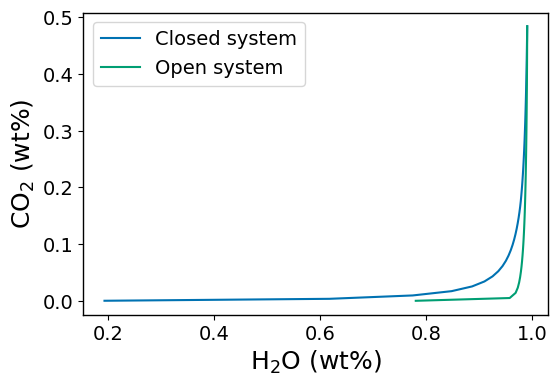

In [9]:
fig, ax = plt.subplots(dpi=100)

ax.plot(closedsys.H2O_liq, closedsys.CO2_liq, label='Closed system')

ax.plot(opensys.H2O_liq, opensys.CO2_liq, label='Open system')

ax.legend()

ax.set_xlabel("H$_2$O (wt%)")
ax.set_ylabel("CO$_2$ (wt%)")

plt.show()